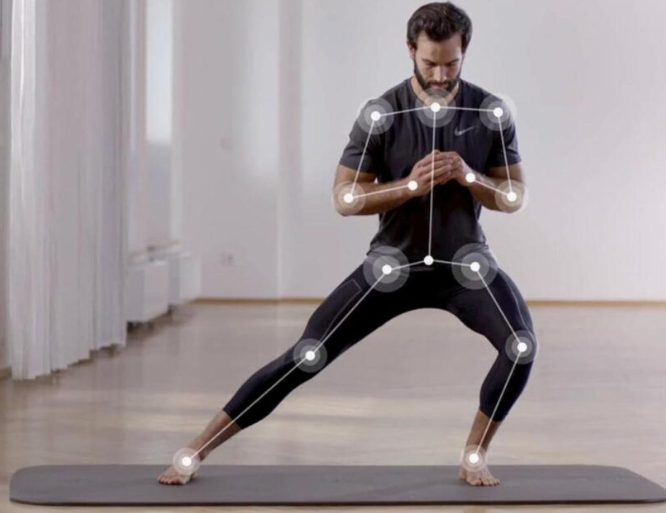

In [1]:
import cv2
import numpy as np
import mediapipe as mp
import math

In [2]:
def findAngle(img, p1, p2, p3, lmList, draw = True):
    
    x1, y1 = lmList[p1][1:] 
    x2, y2 = lmList[p2][1:] 
    x3, y3 = lmList[p3][1:] 
    
    # açı hesapla
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    if angle < 0: angle += 360
    
    if draw:
        cv2.line(img, (x1, y1), (x2, y2), (0,0,255), 3)
        cv2.line(img, (x3, y3), (x2, y2), (0,0,255), 3)
        
        cv2.circle(img, (x1,y1), 10, (0,255,255), cv2.FILLED)
        cv2.circle(img, (x2,y2), 10, (0,255,255), cv2.FILLED)
        cv2.circle(img, (x3,y3), 10, (0,255,255), cv2.FILLED)
        
        cv2.circle(img, (x1,y1), 15, (0,255,255))
        cv2.circle(img, (x2,y2), 15, (0,255,255))
        cv2.circle(img, (x3,y3), 15, (0,255,255))
        
        cv2.putText(img, str(int(angle)), (x2 - 40, y2 + 40), cv2.FONT_HERSHEY_PLAIN, 2, (0,255,255), 2)
    return angle

In [3]:
cap = cv2.VideoCapture("pt1.mp4")

mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

dir = 0
count = 0
while True:
    success, img = cap.read()
    if not success:
        break
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    results = pose.process(imgRGB)
    
    lmList = []
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
    
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w, _ = img.shape
            cx, cy = int(lm.x*w), int(lm.y*h)
            lmList.append([id, cx, cy])
    
    if len(lmList) != 0:
        
        angle = findAngle(img, 11, 13, 15, lmList)
        per = np.interp(angle, (185, 245), (0, 100))
        
        if per == 100:
            if dir == 0:
                count += 0.5
                dir = 1
        if per == 0:
            if dir == 1:
                count += 0.5
                dir = 0  
                
        cv2.putText(img, str(int(count)), (45,125), cv2.FONT_HERSHEY_PLAIN, 10, (255,0,0), 10)
    
    cv2.imshow("image",img)
    cv2.waitKey(40)    

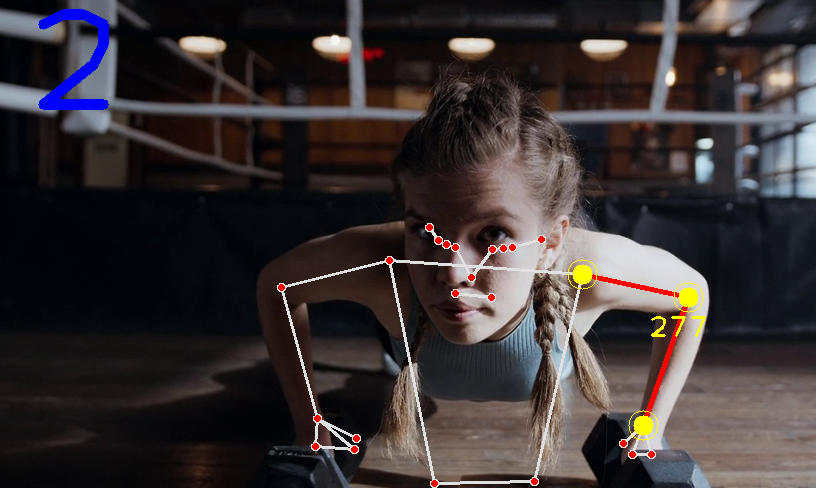

In [4]:
cap = cv2.VideoCapture("pt2.mp4")

mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

dir = 0
count = 0
while True:
    success, img = cap.read()
    if not success:
        break
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    results = pose.process(imgRGB)
    
    lmList = []
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
    
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w, _ = img.shape
            cx, cy = int(lm.x*w), int(lm.y*h)
            lmList.append([id, cx, cy])
    
    if len(lmList) != 0:
    
        angle = findAngle(img, 23, 25, 27, lmList)
        per = np.interp(angle, (65, 145), (0, 100))
        
        if per == 100:
            if dir == 0:
                count += 0.5
                dir = 1
        if per == 0:
            if dir == 1:
                count += 0.5
                dir = 0  
        
        cv2.putText(img, str(int(count)), (45,125), cv2.FONT_HERSHEY_PLAIN, 10, (255,0,0), 10)
    
    cv2.imshow("image",img)
    cv2.waitKey(40)    

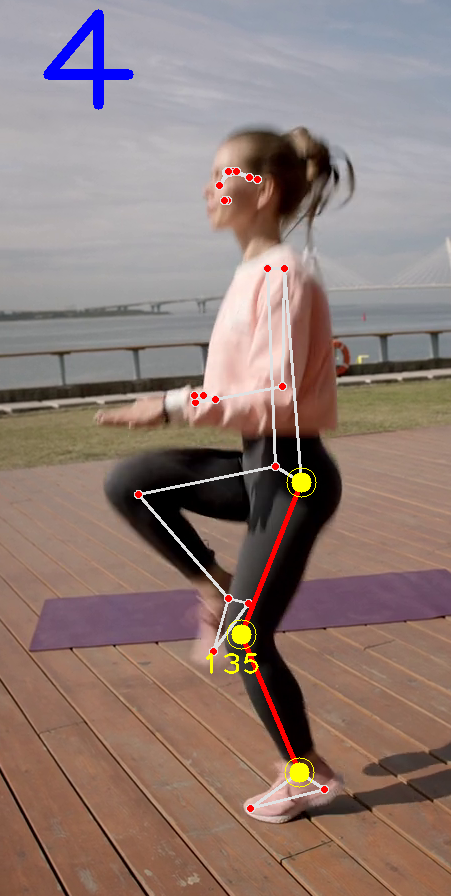

Sources

https://www.udemy.com/course/python-opencv-ile-sfrdan-uzmanlga-goruntu-isleme-gi-1/
    
https://github.com/google/mediapipe/blob/master/docs/solutions/hands.md